In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import sys

In [5]:
sys.path.append('..')

In [6]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
from this_project.eda.plot import plot_roc_pr_curves
from this_project.censusdata import fetch_censusdata, make_linear_preprocessor, make_non_linear_preprocessor

In [8]:
from sklearn import set_config
set_config(display='diagram')

In [9]:
X, y = fetch_censusdata()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
preprocessor_1 = make_non_linear_preprocessor()

In [12]:
preprocessor_1

FeatureUnion(transformer_list=[('pipeline-1',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['workclass',
                                                                         'education',
                                                                         'marital_status',
                                                                         'occupation',
                                                                         'relationship',
                                                                         'race',
                                                                         'sex',
                                                                         'native_country'])),
                                                ('simpleimputer',
                                                 SimpleImputer(fill_value='MISSING',
                                                               strategy='constant'))])),
                               ('pipeline-2',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['age',
                                                                         'fnlwgt',
                                                                         'education_num',
                                                                         'capital_gain',
                                                                         'capital_loss',
                                                                         'hours_per_week']))])),
                               ('pipeline-3',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['occupation',
                                                                         'sex',
                                                                         'race',
                                                                         'marital_status'])),
                                                ('simpleimputer',
                                                 SimpleImputer(fill_value='MISSING',
                                                               strategy='constant')),
                                                ('crossfeaturecalculator',
                                                 CrossFeatureCalculator())]))])

In [13]:
preprocessor_2 = make_linear_preprocessor()

In [14]:
preprocessor_2

FeatureUnion(transformer_list=[('pipeline-1',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=[0, 1,
                                                                         2, 3,
                                                                         4, 5,
                                                                         6,
                                                                         7])),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore'))])),
                               ('pipeline-2',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=[8, 9,
                                                                         10, 11,
                                                                         12,
                                                                         13])),
                                                ('simpleimputer',
                                                 SimpleImputer(strategy='median')),
                                                ('standardscaler',
                                                 StandardScaler())])),
                               ('pipeline-3',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=[14, 15,
                                                                         16, 17,
                                                                         18,
                                                                         19])),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore'))]))])

In [15]:
clf = LogisticRegression(C=27., max_iter=1000, class_weight='balanced', random_state=0)

In [16]:
clf

LogisticRegression(C=27.0, class_weight='balanced', max_iter=1000,
                   random_state=0)

In [17]:
X_train_tr = preprocessor_1.fit_transform(X_train)
X_test_tr = preprocessor_1.transform(X_test)
X_test_tr = preprocessor_1.transform(X_test)

In [18]:
X_train_tr = preprocessor_2.fit_transform(X_train_tr)
X_test_tr = preprocessor_2.transform(X_test_tr)

In [19]:
clf.fit(X_train_tr, y_train)

print("model score: %.3f" % clf.score(X_test_tr, y_test))

model score: 0.806


In [26]:
clf.fit(X_train_tr, y_train)
# print("model score: %.3f" % clf.score(X_test, y_test))

LogisticRegression(C=27.0, class_weight='balanced', max_iter=1000,
                   random_state=0)

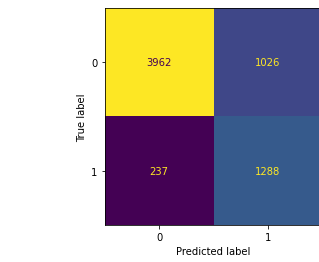

In [20]:
y_pred = clf.predict(X_test_tr)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

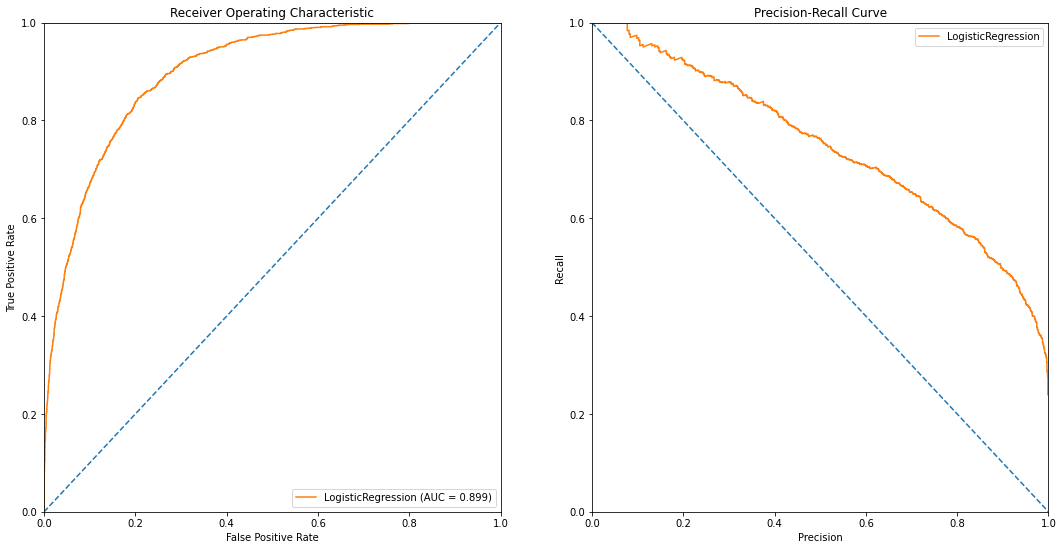

In [24]:
fig = plot_roc_pr_curves(clf, X_test_tr, y_test)

In [22]:
y_pred = clf.predict(X_test_tr)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'precision: {precision}; recall: {recall}; fscore: {fscore}')

precision: 0.5566119273984442; recall: 0.8445901639344262; fscore: 0.6710080750195363
